1. Create data and implement PCA algorithm then visualize each step like the below figure.
2. Implement PCA algorithm to reduce dimension (2D) of iris dataset, then visualize  the result.
3. Use PCA in sklearn to iris dataset and compare the result with the question 2

## Ex1

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

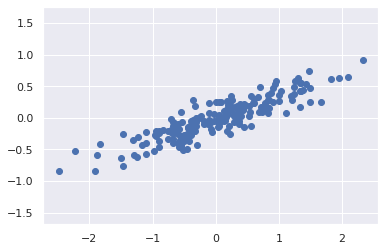

In [26]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

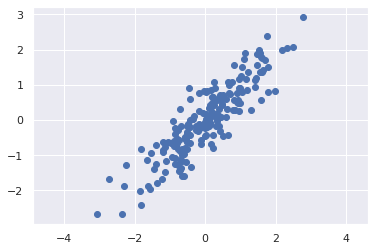

In [28]:
#Step-1
X_std = (X - np.mean(X , axis = 0))/X.std(axis=0)
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.axis('equal')
plt.show()

In [35]:
#Step-2 Calculate the covariance matrix
cov_mat = np.cov(X_std.T)
cov_mat

array([[1.00502513, 0.89385925],
       [0.89385925, 1.00502513]])

In [36]:
#Step-3: Compute Eigen Values and Eigen Vectors
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
for i in range(len(eig_vec_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,2).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

Eigenvector 1: 
[[-0.70710678]
 [ 0.70710678]]
Eigenvalue 1 from covariance matrix: 0.11116587537580591
----------------------------------------
Eigenvector 2: 
[[-0.70710678]
 [-0.70710678]]
Eigenvalue 2 from covariance matrix: 1.898884375880475
----------------------------------------


In [37]:
# Step 4: Sort the eigenvectors by decreasing eigenvalues and choose the eigenvector with the largest eigenvalues to form a dimensional matrix W

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov [:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.898884375880475
0.11116587537580591


In [38]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1),
                      eig_pairs[1][1].reshape(2,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [48]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [-0.70710678 -0.70710678]


In [49]:
# Step 5 Transforming the samples onto the new subspace
Y = X_std.dot(matrix_w)

## Ex 2

In [13]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
iris = pd.read_csv("/content/IRIS.csv")

In [15]:
x = iris.drop(['species'],axis=1)
y = iris.species

#Scaling the Data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
#Calculate the covariance matrix:
iris_cov_matrix = np.cov(x.T)
iris_cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [30]:
x.shape

(150, 4)

In [17]:
#Calculating the eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(iris_cov_matrix)
print('Eigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [18]:
#Sorting the list of eigenvalues in descending order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [19]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance captured by each component is \n',var_exp)
print('Cumulative variance captured as we travel with each component \n',cum_var_exp)

Variance captured by each component is 
 [72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]
Cumulative variance captured as we travel with each component 
 [ 72.77045209  95.80097536  99.48480732 100.        ]


As we can see the first two componentes account nearly 96% of the total variance. If we only use this two components we are able to shrink the size of the dataset by half (2 instead of 4 columns).

In [20]:
# Transforming the samples onto the new subspace
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [21]:
Y = x.dot(matrix_w)

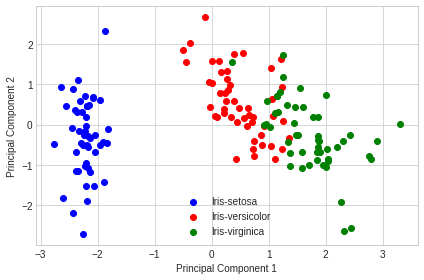

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## Ex 3

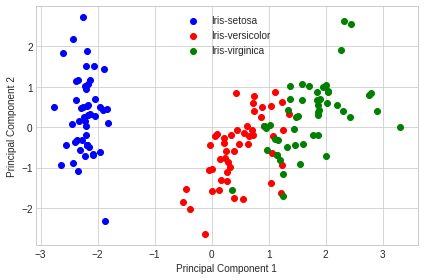

In [24]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(x)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

The three classes appear to be well separated! Iris-virginica and Iris-versicolor could be better separated.